Name: Muley, Tushar

Title: Exercise_4-2_Week_4

Date: April 11, 2021

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


1.Load the data file DailyComments.csv from the Week 4 Data Files into a data frame.

In [13]:
#Read my CSV
df_daily_comments=pd.read_csv('DailyComments.csv',encoding= 'unicode_escape')

In [14]:
df_daily_comments

,Day of Week,comments
0,Monday,"Hello, how are you?"
1,Tuesday,Today is a good day!
2,Wednesday,It's my birthday so it's a really special day!
3,Thursday,Today is neither a good day or a bad day!
4,Friday,I'm having a bad day.
5,Saturday,There' s nothing special happening today.
6,Sunday,Today is a SUPER good day!


2.Identify a scheme to categorize each comment as positive or negative. You can devise your own scheme or find a commonly used scheme to perform this sentiment analysis. However you decide to do this, make sure to explain the scheme you decide to use.

Why I used VADER for my sentiment analysis. I choose VADER because it made sense to me. It use sentiment lexicon, grammatical rule and syntactical convention approaches to determine polarity and intensity. I felt that VADER was more round Natural Language Processing (NLP) algorithm. It combines sentiment lexicon which using urban slang words like “the bomb” as a positive sentiment instead of taking the word “bomb” as an individuals word and making it a negative sentiment. Since VADER was built for social media analysis it would be more rounded. After reading about I wanted to use VADRE compared to TextBlob which was another one I was considering. VADER when tested to human sentiment was more accurate so that also influenced my selection.


3.Implement your sentiment analysis with code and display the results. Note: DailyComments.csv is a purposely small file, so you will be able to clearly see why the results are what they are.


In [7]:
#Download Libraries and import libraries
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Tushar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
#Small test to see if it works
a = 'This was the best, most awesome movie EVER MADE!!!'
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.425, 'pos': 0.575, 'compound': 0.8877}

In [16]:
a = "I am so sad and lonely"
sid.polarity_scores(a)

{'neg': 0.672, 'neu': 0.328, 'pos': 0.0, 'compound': -0.7316}

In [17]:
#Run sentiment analysis on file
df_daily_comments["scores"] = df_daily_comments["comments"].apply(lambda comments: sid.polarity_scores(comments))

In [18]:
#Expand column width
pd.set_option("max_colwidth", None)
#Preveiw resutls
df_daily_comments.head(7)

,Day of Week,comments,scores
0,Monday,"Hello, how are you?","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
1,Tuesday,Today is a good day!,"{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.4926}"
2,Wednesday,It's my birthday so it's a really special day!,"{'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'compound': 0.5497}"
3,Thursday,Today is neither a good day or a bad day!,"{'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.735}"
4,Friday,I'm having a bad day.,"{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}"
5,Saturday,There' s nothing special happening today.,"{'neg': 0.361, 'neu': 0.639, 'pos': 0.0, 'compound': -0.3089}"
6,Sunday,Today is a SUPER good day!,"{'neg': 0.0, 'neu': 0.277, 'pos': 0.723, 'compound': 0.8327}"


In [19]:
#Split out compound into another column
df_daily_comments["compound"] = df_daily_comments["scores"].apply(lambda score_dict: score_dict["compound"])
#Preview
df_daily_comments.head(7)

,Day of Week,comments,scores,compound
0,Monday,"Hello, how are you?","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
1,Tuesday,Today is a good day!,"{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.4926}",0.4926
2,Wednesday,It's my birthday so it's a really special day!,"{'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'compound': 0.5497}",0.5497
3,Thursday,Today is neither a good day or a bad day!,"{'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.735}",-0.7350
4,Friday,I'm having a bad day.,"{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}",-0.5423
5,Saturday,There' s nothing special happening today.,"{'neg': 0.361, 'neu': 0.639, 'pos': 0.0, 'compound': -0.3089}",-0.3089
6,Sunday,Today is a SUPER good day!,"{'neg': 0.0, 'neu': 0.277, 'pos': 0.723, 'compound': 0.8327}",0.8327


In [20]:
#Based on compound score define postive, negative or netural
df_daily_comments['comp_score'] = df_daily_comments['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df_daily_comments.head(7)

,Day of Week,comments,scores,compound,comp_score
0,Monday,"Hello, how are you?","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,pos
1,Tuesday,Today is a good day!,"{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.4926}",0.4926,pos
2,Wednesday,It's my birthday so it's a really special day!,"{'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'compound': 0.5497}",0.5497,pos
3,Thursday,Today is neither a good day or a bad day!,"{'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.735}",-0.7350,neg
4,Friday,I'm having a bad day.,"{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}",-0.5423,neg
5,Saturday,There' s nothing special happening today.,"{'neg': 0.361, 'neu': 0.639, 'pos': 0.0, 'compound': -0.3089}",-0.3089,neg
6,Sunday,Today is a SUPER good day!,"{'neg': 0.0, 'neu': 0.277, 'pos': 0.723, 'compound': 0.8327}",0.8327,pos


In [21]:
#Count how many are positive (pos) and negative (neg)
df_daily_comments["comp_score"].value_counts()


pos    4
neg    3
Name: comp_score, dtype: int64

4.For up to 5% extra credit, find another set of comments, e.g., some tweets, and perform the same sentiment analysis.


In [23]:
#Read my CSV
df_covid_tweets=pd.read_csv('covid19_tweets.csv',encoding= 'unicode_escape')

In [24]:
#Review the file
df_covid_tweets.head()

,user_location,date,text
0,astroworld,7/25/2020 12:27,"If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated thatâ¦ https://t.co/QZvYbrOgb0"
1,"New York, NY",7/25/2020 12:27,Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the Aâ¦ https://t.co/1QvW0zgyPu
2,"Pewee Valley, KY",7/25/2020 12:27,@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort toâ¦ https://t.co/Jkk8vHWHb3
3,Stuck in the Middle,7/25/2020 12:27,@brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around meâ¦ https://t.co/Z0pOAlFXcW
4,Jammu and Kashmir,7/25/2020 12:27,25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANIâ¦ https://t.co/MN0EEcsJHh


In [28]:
# Remove NaN Values:
df_covid_tweets.dropna(inplace=True)

lst_blanks = []  #Empty List

for i,ul,dt,txt in df_covid_tweets.itertuples():  #Loop through
    if type(txt)==str:            
        if txt.isspace():        
            lst_blanks.append(i)     

df_covid_tweets.drop(lst_blanks, inplace=True)

In [29]:
#Preview resutls
df_covid_tweets

,user_location,date,text
0,astroworld,7/25/2020 12:27,"If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated thatâ¦ https://t.co/QZvYbrOgb0"
1,"New York, NY",7/25/2020 12:27,Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the Aâ¦ https://t.co/1QvW0zgyPu
2,"Pewee Valley, KY",7/25/2020 12:27,@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort toâ¦ https://t.co/Jkk8vHWHb3
3,Stuck in the Middle,7/25/2020 12:27,@brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around meâ¦ https://t.co/Z0pOAlFXcW
4,Jammu and Kashmir,7/25/2020 12:27,25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANIâ¦ https://t.co/MN0EEcsJHh
...,...,...,...
179103,"Ilorin, Nigeria",8/29/2020 19:44,"Thanks @IamOhmai for nominating me for the @WHO #WearAMask challenge.\n\nI nominate @abdlbaasit_ @hvbxxb,â¦ https://t.co/IegQDkKudT"
179104,Ontario,8/29/2020 19:44,2020! The year of insanity! Lol! #COVID19 https://t.co/y48NP0yzgn
179105,ð¨ð¦ Canada,8/29/2020 19:44,@CTVNews A powerful painting by Juan Lucena. It's a tribute to the grandparents who died of COVID 19 and the grandcâ¦ https://t.co/wnXbbyoCe2
179106,New York City,8/29/2020 19:44,"More than 1,200 students test positive for #COVID19 at major university - ABC News https://t.co/6aNhSiF5gh"


In [31]:
#List of special charters
lst_spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–","\n"]

for char in lst_spec_chars:
    df_covid_tweets["text"] = df_covid_tweets["text"].str.replace(char," ")

In [32]:
#Preview Results
df_covid_tweets

,user_location,date,text
0,astroworld,7/25/2020 12:27,If I smelled the scent of hand sanitizers today on someone in the past I would think they were so intoxicated thatâ¦ https t co QZvYbrOgb0
1,"New York, NY",7/25/2020 12:27,Hey Yankees YankeesPR and MLB wouldn t it have made more sense to have the players pay their respects to the Aâ¦ https t co 1QvW0zgyPu
2,"Pewee Valley, KY",7/25/2020 12:27,diane3443 wdunlap realDonaldTrump Trump never once claimed COVID19 was a hoax We all claim that this effort toâ¦ https t co Jkk8vHWHb3
3,Stuck in the Middle,7/25/2020 12:27,brookbanktv The one gift COVID19 has give me is an appreciation for the simple things that were always around meâ¦ https t co Z0pOAlFXcW
4,Jammu and Kashmir,7/25/2020 12:27,25 July Media Bulletin on Novel CoronaVirusUpdates COVID19 kansalrohit69 DrSyedSehrish airnewsalerts ANIâ¦ https t co MN0EEcsJHh
...,...,...,...
179103,"Ilorin, Nigeria",8/29/2020 19:44,Thanks IamOhmai for nominating me for the WHO WearAMask challenge I nominate abdlbaasit hvbxxb â¦ https t co IegQDkKudT
179104,Ontario,8/29/2020 19:44,2020 The year of insanity Lol COVID19 https t co y48NP0yzgn
179105,ð¨ð¦ Canada,8/29/2020 19:44,CTVNews A powerful painting by Juan Lucena It s a tribute to the grandparents who died of COVID 19 and the grandcâ¦ https t co wnXbbyoCe2
179106,New York City,8/29/2020 19:44,More than 1 200 students test positive for COVID19 at major university ABC News https t co 6aNhSiF5gh


In [36]:
#Cleaning the special character 'â' and data at the end of the text.
for txt in df_covid_tweets["text"]:
    if "â" in txt:
        row_num = df_covid_tweets.loc[df_covid_tweets["text"]==txt].index[0]
        df_covid_tweets.at[row_num, "text"] = txt[:txt.index("â")]

#Preview what the data looks like
df_covid_tweets

,user_location,date,text,scores
0,astroworld,7/25/2020 12:27,If I smelled the scent of hand sanitizers today on someone in the past I would think they were so intoxicated that,"{'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'compound': 0.4939}"
1,"New York, NY",7/25/2020 12:27,Hey Yankees YankeesPR and MLB wouldn t it have made more sense to have the players pay their respects to the A,"{'neg': 0.054, 'neu': 0.856, 'pos': 0.089, 'compound': 0.2263}"
2,"Pewee Valley, KY",7/25/2020 12:27,diane3443 wdunlap realDonaldTrump Trump never once claimed COVID19 was a hoax We all claim that this effort to,"{'neg': 0.1, 'neu': 0.9, 'pos': 0.0, 'compound': -0.2732}"
3,Stuck in the Middle,7/25/2020 12:27,brookbanktv The one gift COVID19 has give me is an appreciation for the simple things that were always around me,"{'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'compound': 0.7351}"
4,Jammu and Kashmir,7/25/2020 12:27,25 July Media Bulletin on Novel CoronaVirusUpdates COVID19 kansalrohit69 DrSyedSehrish airnewsalerts ANI,"{'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.3182}"
...,...,...,...,...
179103,"Ilorin, Nigeria",8/29/2020 19:44,Thanks IamOhmai for nominating me for the WHO WearAMask challenge I nominate abdlbaasit hvbxxb,"{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.4939}"
179104,Ontario,8/29/2020 19:44,2020 The year of insanity Lol COVID19 https t co y48NP0yzgn,"{'neg': 0.255, 'neu': 0.552, 'pos': 0.193, 'compound': -0.2263}"
179105,ð¨ð¦ Canada,8/29/2020 19:44,CTVNews A powerful painting by Juan Lucena It s a tribute to the grandparents who died of COVID 19 and the grandc,"{'neg': 0.136, 'neu': 0.758, 'pos': 0.106, 'compound': -0.2023}"
179106,New York City,8/29/2020 19:44,More than 1 200 students test positive for COVID19 at major university ABC News https t co 6aNhSiF5gh,"{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.5574}"


In [21]:
#Drop file to PC to be saved. The above step is very costly on time and CPU taking over 30minutes to run
df_covid_tweets.to_csv('covid_tweets_cleaned.csv')

#To be toggled between Markdown and code. Run if needed.
#Pickup the dropped file to use from this step forward.
df_covid_tweets=pd.read_csv('covid_tweets_cleaned.csv',encoding= 'unicode_escape')

Note: Onl run this step below if file was picked up from desktop for saving. Not needed if running the full Notebook.


In [35]:
#Expand column width - Only run this if needed.
pd.set_option("max_colwidth", None)

In [37]:
#Run VARDER on covid_tweets
df_covid_tweets["scores"] = df_covid_tweets["text"].apply(lambda text: sid.polarity_scores(text))
#Print out the top 10 rows
df_covid_tweets.head(10)

,user_location,date,text,scores
0,astroworld,7/25/2020 12:27,If I smelled the scent of hand sanitizers today on someone in the past I would think they were so intoxicated that,"{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.4939}"
1,"New York, NY",7/25/2020 12:27,Hey Yankees YankeesPR and MLB wouldn t it have made more sense to have the players pay their respects to the A,"{'neg': 0.065, 'neu': 0.829, 'pos': 0.106, 'compound': 0.2263}"
2,"Pewee Valley, KY",7/25/2020 12:27,diane3443 wdunlap realDonaldTrump Trump never once claimed COVID19 was a hoax We all claim that this effort to,"{'neg': 0.116, 'neu': 0.884, 'pos': 0.0, 'compound': -0.2732}"
3,Stuck in the Middle,7/25/2020 12:27,brookbanktv The one gift COVID19 has give me is an appreciation for the simple things that were always around me,"{'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'compound': 0.7351}"
4,Jammu and Kashmir,7/25/2020 12:27,25 July Media Bulletin on Novel CoronaVirusUpdates COVID19 kansalrohit69 DrSyedSehrish airnewsalerts ANI,"{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'compound': 0.3182}"
5,ÐÐ¾Ð²Ð¾ÑÐ¾ÌÑÑÐ¸Ñ,7/25/2020 12:27,coronavirus covid19 deaths continue to rise It s almost as bad as it ever was Politicians and businesses want,"{'neg': 0.157, 'neu': 0.78, 'pos': 0.063, 'compound': -0.4445}"
6,"Gainesville, FL",7/25/2020 12:27,How COVID19 Will Change Work in General and recruiting specifically via ProactiveTalent Recruiting,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
9,ðð»location at link belowðð»,7/25/2020 12:26,POPE AS GOD Prophet Sadhu Sundar Selvaraj Watch here at https t co 7X5RTyKVji HurricaneHanna COVID19,"{'neg': 0.0, 'neu': 0.832, 'pos': 0.168, 'compound': 0.4278}"
11,"Dhaka,Bangladesh",7/25/2020 12:26,Order here https t co 4NUrGX6EmA logo graphicdesigner logodesign logodesinger icon minimalist Abstract,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
12,Hotel living - various cities! Who needs a home when hotel living is so fabulous!,7/25/2020 12:26,ðð» PattyHajdu NavdeepSBains,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"


In [38]:
#Split out compound into another column
df_covid_tweets["compound"] = df_covid_tweets["scores"].apply(lambda score_dict: score_dict["compound"])
#Preview
df_covid_tweets.head(7)

,user_location,date,text,scores,compound
0,astroworld,7/25/2020 12:27,If I smelled the scent of hand sanitizers today on someone in the past I would think they were so intoxicated that,"{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.4939}",0.4939
1,"New York, NY",7/25/2020 12:27,Hey Yankees YankeesPR and MLB wouldn t it have made more sense to have the players pay their respects to the A,"{'neg': 0.065, 'neu': 0.829, 'pos': 0.106, 'compound': 0.2263}",0.2263
2,"Pewee Valley, KY",7/25/2020 12:27,diane3443 wdunlap realDonaldTrump Trump never once claimed COVID19 was a hoax We all claim that this effort to,"{'neg': 0.116, 'neu': 0.884, 'pos': 0.0, 'compound': -0.2732}",-0.2732
3,Stuck in the Middle,7/25/2020 12:27,brookbanktv The one gift COVID19 has give me is an appreciation for the simple things that were always around me,"{'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'compound': 0.7351}",0.7351
4,Jammu and Kashmir,7/25/2020 12:27,25 July Media Bulletin on Novel CoronaVirusUpdates COVID19 kansalrohit69 DrSyedSehrish airnewsalerts ANI,"{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'compound': 0.3182}",0.3182
5,ÐÐ¾Ð²Ð¾ÑÐ¾ÌÑÑÐ¸Ñ,7/25/2020 12:27,coronavirus covid19 deaths continue to rise It s almost as bad as it ever was Politicians and businesses want,"{'neg': 0.157, 'neu': 0.78, 'pos': 0.063, 'compound': -0.4445}",-0.4445
6,"Gainesville, FL",7/25/2020 12:27,How COVID19 Will Change Work in General and recruiting specifically via ProactiveTalent Recruiting,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000


In [39]:
#Based on compound score define postive, negative or netural
df_covid_tweets['comp_score'] = df_covid_tweets['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
#Preview
df_covid_tweets.head(7)

,user_location,date,text,scores,compound,comp_score
0,astroworld,7/25/2020 12:27,If I smelled the scent of hand sanitizers today on someone in the past I would think they were so intoxicated that,"{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.4939}",0.4939,pos
1,"New York, NY",7/25/2020 12:27,Hey Yankees YankeesPR and MLB wouldn t it have made more sense to have the players pay their respects to the A,"{'neg': 0.065, 'neu': 0.829, 'pos': 0.106, 'compound': 0.2263}",0.2263,pos
2,"Pewee Valley, KY",7/25/2020 12:27,diane3443 wdunlap realDonaldTrump Trump never once claimed COVID19 was a hoax We all claim that this effort to,"{'neg': 0.116, 'neu': 0.884, 'pos': 0.0, 'compound': -0.2732}",-0.2732,neg
3,Stuck in the Middle,7/25/2020 12:27,brookbanktv The one gift COVID19 has give me is an appreciation for the simple things that were always around me,"{'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'compound': 0.7351}",0.7351,pos
4,Jammu and Kashmir,7/25/2020 12:27,25 July Media Bulletin on Novel CoronaVirusUpdates COVID19 kansalrohit69 DrSyedSehrish airnewsalerts ANI,"{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'compound': 0.3182}",0.3182,pos
5,ÐÐ¾Ð²Ð¾ÑÐ¾ÌÑÑÐ¸Ñ,7/25/2020 12:27,coronavirus covid19 deaths continue to rise It s almost as bad as it ever was Politicians and businesses want,"{'neg': 0.157, 'neu': 0.78, 'pos': 0.063, 'compound': -0.4445}",-0.4445,neg
6,"Gainesville, FL",7/25/2020 12:27,How COVID19 Will Change Work in General and recruiting specifically via ProactiveTalent Recruiting,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,pos


In [40]:
#Count how many are positive (pos) and negative (neg)
df_covid_tweets["comp_score"].value_counts()

pos    106186
neg     36151
Name: comp_score, dtype: int64

In [46]:
import seaborn as sns

Text(0.5, 0, 'Sentiment')

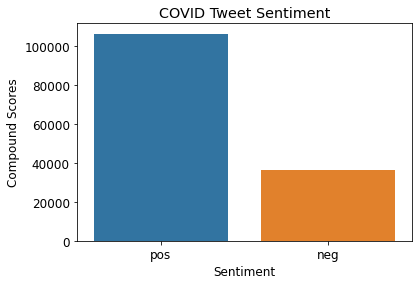

In [51]:
sns.barplot(x=df_covid_tweets.comp_score.value_counts().index, y=df_covid_tweets.comp_score.value_counts())
plt.title('COVID Tweet Sentiment')
plt.ylabel ("Compound Scores")
plt.xlabel ("Sentiment")